## Adults dataset :


In [1]:
# Importing important libraries for loading the data
import pandas as pd
import numpy as np
data= pd.read_csv("adult.csv")

In [2]:
# Importing libraries from sklearn to be used in the further steps.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
# replacing missing values "?" with nan values
data=data.replace("?",np.nan)

In [4]:
# Converting target variable to (0,1) values for salary <=50K as 0 & >50K as 1.
data["income"]=data["income"].replace("<=50K",0)
data["income"]=data["income"].replace(">50K",1)


In [5]:
# Checking the unique values in the target variable
data["income"].unique()

array([0, 1], dtype=int64)

In [6]:
# treating the nan values by using the fillna method of "backfill" for the below columns

data["workclass"]=data["workclass"].fillna(method="bfill")
data["occupation"]=data["occupation"].fillna(method="bfill")
data["native.country"]=data["native.country"].fillna(method="bfill")


In [7]:
# Checking the percentage of null values in the dataset
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
# checking the data after imputation.
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [9]:
# Creating dummy variables for categorical values.

dummies_data = pd.get_dummies(data,columns=["workclass","education","marital.status","occupation","relationship","race","sex","native.country"],drop_first=True)

In [10]:
# Data after conversion to numerical values
dummies_data

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Feature Selection using SelectKBest method :

In [11]:
# Selecting Independent and dependent variables for modelling
IV = dummies_data.drop("income",axis=1)
DV = dummies_data["income"]

In [12]:
# Importing SelectKBest for feature selection
from sklearn.feature_selection import SelectKBest ,chi2

In [29]:
# This gives the 10 best features on the basis of the score
best= SelectKBest(score_func=chi2,k=10)
best

SelectKBest(k=10, score_func=<function chi2 at 0x000001D4B052D5E8>)

In [14]:
# Fitting the model using the SelectKBest Technique
FIT=best.fit(IV,DV)

In [15]:
# Creating Dataframes having Fetures and another Dataframe for there corresponding scores
df_fit=pd.DataFrame(FIT.scores_)
df_cols=pd.DataFrame(IV.columns)

In [16]:
# Concating the above two datasets with features and scores

feature_df = pd.concat([df_cols,df_fit],axis=1)
feature_df.columns= ["Features","Score"]

In [32]:
# Sorting the data on the basis of scores to select the top ten features
xy=feature_df[["Features","Score"]].sort_values(by="Score",ascending=False).head(10)
xy

,Features,Score
3,capital.gain,8.219247e+07
4,capital.loss,1.372146e+06
1,fnlwgt,1.711477e+05
0,age,8.600612e+03
5,hours.per.week,6.476409e+03
29,marital.status_Married-civ-spouse,3.477516e+03
2,education.num,2.401422e+03
31,marital.status_Never-married,2.218522e+03
49,relationship_Own-child,1.435873e+03
36,occupation_Exec-managerial,1.178920e+03


# Replacing fnlwgt with its mean of output variable :
   - Here we are substituting the values in the "fnlwgt" with the mean of there income value.
   - Thus now the "fnlwgt" values are mean of their corresponding values in the target variable.
   - Thus this will show the affect of each value of column "fnlwgt" on the target variable.

In [18]:
data1 = data.pivot_table(index="fnlwgt",values="income",aggfunc=np.mean)
abc=pd.Series(data1["income"],index=data1.index)

In [33]:
abc.unique()

array([0.        , 1.        , 0.6       , 0.25      , 0.33333333,
       0.75      , 0.5       , 0.66666667, 0.2       , 0.4       ,
       0.57142857, 0.8       , 0.16666667, 0.11111111, 0.42857143,
       0.7       , 0.14285714, 0.81818182, 0.71428571, 0.28571429,
       0.875     , 0.625     , 0.54545455, 0.22222222, 0.375     ,
       0.55555556, 0.44444444, 0.1       , 0.91666667, 0.92307692,
       0.09090909, 0.85714286, 0.83333333, 0.72727273, 0.125     ,
       0.38461538, 0.36363636, 0.30769231, 0.77777778])

In [20]:
# Substituting the column "fnlwgt"
data["fnlwgt"]=data["fnlwgt"].map(abc)
data        

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,0.00,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,0.00,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,0.00,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,0.00,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,0.00,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,0.00,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,0.00,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,0.75,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,0.00,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


## Fitting the GaussianNB model :

In [21]:
# Label encoding the numerical data
# THus this will rank the data on gthe basis of there weightage
# Higher values will get lower ranks that is bigger value eg. 9,10...
# Whereas the lower values will get higher Ranks eg. 1,2...
# Thus this label encoding will help the machine ton understand which value is of higher weightage and vise versa

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data["workclass"]=le.fit_transform(data["workclass"])
data["occupation"]=le.fit_transform(data["occupation"])
data["education"]=le.fit_transform(data["education"])
data["marital.status"]=le.fit_transform(data["marital.status"])
data["capital.gain"]=le.fit_transform(data["capital.gain"])
data["capital.loss"]=le.fit_transform(data["capital.loss"])
data["hours.per.week"]=le.fit_transform(data["hours.per.week"])
data["relationship"]=le.fit_transform(data["relationship"])

In [22]:
# Independent and dependent variables
IV_data= data[["age","fnlwgt","relationship","marital.status","capital.gain","hours.per.week","education.num"]]
DV_data=data["income"]

In [24]:
# Classifier to be used 
clf=GaussianNB()

In [25]:
# Spliting he data into training  and testing sets
trainx,testx,trainy,testy = train_test_split(IV_data,DV_data,test_size=0.2,random_state=0)

In [26]:
# Fitting the model
clf.fit(trainx,trainy)
y_pred=clf.predict(testx)
accuracy_score(testy,y_pred)

0.9184707508060801

In [27]:
# Confusion matrix for the above predictions
confusion_matrix(testy,y_pred)

array([[4634,  332],
       [ 199, 1348]], dtype=int64)

## Feature selection using corr heatmap :

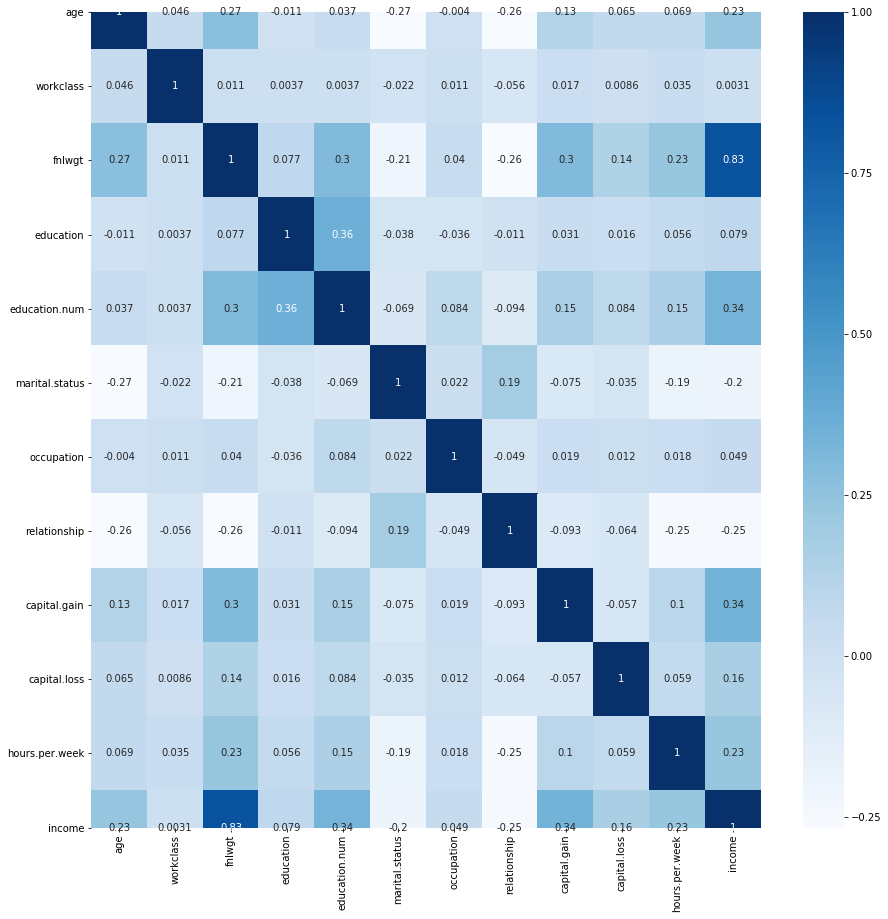

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="Blues")
